In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
raw_df = pd.read_csv("data/tech_fundings.csv")

raw_df.head()

,index,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
0,1,Internxt,https://internxt.com/,Spain,Blockchain,278940,Seed,Jan-20
1,2,Dockflow,https://dockflow.com,Belgium,Logistics,292244,Seed,Jan-20
2,3,api.video,https://api.video,France,Developer APIs,300000,Seed,Jan-20
3,4,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,Jan-20
4,5,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,Jan-20


In [54]:
# We can remove the index column

raw_df.drop(columns=["index"], inplace=True)

In [55]:
raw_df.head()

,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
0,Internxt,https://internxt.com/,Spain,Blockchain,278940,Seed,Jan-20
1,Dockflow,https://dockflow.com,Belgium,Logistics,292244,Seed,Jan-20
2,api.video,https://api.video,France,Developer APIs,300000,Seed,Jan-20
3,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000,Seed,Jan-20
4,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013,Seed,Jan-20


In [56]:
# Describing the dataset

raw_df.describe()

,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
count,3575,3575,3563,3575,3575,3575,3575
unique,3224,3343,72,143,969,22,19
top,Internxt,https://internxt.com/,United States,B2B Software,10000000,Series A,May-21
freq,4,4,2034,632,105,951,332


In [57]:
raw_df["Funding Amount (USD)"].replace({"Unknown":'0'}, inplace=True)

In [58]:
type_dict = {"Funding Amount (USD)":float}

raw_df["Funding Amount (USD)"] = raw_df["Funding Amount (USD)"].astype(type_dict)

raw_df.dtypes

Company                  object
Website                  object
Region                   object
Vertical                 object
Funding Amount (USD)    float64
Funding Stage            object
Funding Date             object
dtype: object

In [59]:
raw_df.head()

,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
0,Internxt,https://internxt.com/,Spain,Blockchain,278940.0,Seed,Jan-20
1,Dockflow,https://dockflow.com,Belgium,Logistics,292244.0,Seed,Jan-20
2,api.video,https://api.video,France,Developer APIs,300000.0,Seed,Jan-20
3,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000.0,Seed,Jan-20
4,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013.0,Seed,Jan-20


In [60]:
from datetime import datetime

# Handling timedates

raw_df["Funding Date"] = raw_df["Funding Date"].map(lambda x : datetime.strptime(x, "%b-%y"))

raw_df.head()

,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
0,Internxt,https://internxt.com/,Spain,Blockchain,278940.0,Seed,2020-01-01
1,Dockflow,https://dockflow.com,Belgium,Logistics,292244.0,Seed,2020-01-01
2,api.video,https://api.video,France,Developer APIs,300000.0,Seed,2020-01-01
3,Buck.ai,https://buck.ai/,United States,Artificial Intelligence,300000.0,Seed,2020-01-01
4,Prodsight,https://www.prodsight.ai,United Kingdom,Artificial Intelligence,529013.0,Seed,2020-01-01


In [61]:
raw_df["Region"].value_counts()

United States                 2034
United Kingdom                 319
India                          156
Canada                         111
Germany                        101
                              ... 
Malta                            1
Ghana                            1
Belize                           1
Slovakia (Slovak Republic)       1
Senegal                          1
Name: Region, Length: 72, dtype: int64

In [62]:
df_countries = pd.read_csv("data/countries.csv", sep=";")

df_countries.drop(columns=["No", "ISO-alpha3 Code", "M49 Code", "Region 1", "Region 2"], inplace=True)

df_countries.head()

,Country or Area,Continent
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania


In [63]:
# Some values don't match our values
replace_dict = {"United States of America":"United States",
                "United Kingdom of Great Britain and Northern Ireland":"United Kingdom",
                "Netherlands":"The Netherlands",
                "China, Hong Kong Special Administrative Region":"Hong Kong",
                "Republic of Korea":"South Korea",
                "Czechia":"Czech Republic",
                "China":"Taiwan",
                "Slovakia":"Slovakia (Slovak Republic)",
                "Viet Nam":"Vietnam"}

df_countries["Country or Area"].replace(replace_dict, inplace=True)

In [64]:
#This function tries to find the continent of a given country. If not, it returns the country
def find_continent(country):
    continent = ""
    if df_countries.loc[df_countries["Country or Area"] == country]["Continent"].values.size > 0:
        continent = df_countries.loc[df_countries["Country or Area"] == country]["Continent"].values[0]
    else: #We cannot find the country, probably a naming difference
        continent = country
    return continent

#We replace the Region with the continent, instead of the country
raw_df["Region"] = raw_df["Region"].map(lambda x : find_continent(x))

raw_df["Region"].value_counts()
#Note: we still have 3 Unknown values

North America    2159
Europe            830
Asia              417
Oceania            58
South America      46
Africa             39
China              11
Unkown              3
Name: Region, dtype: int64

In [65]:
#Replacing Unkown values with np.NaN
raw_df["Region"].replace({"Unkown":np.nan}, inplace=True)

In [68]:
#Let's have a look at Nan values
raw_df.isna().sum()

Company                  0
Website                  0
Region                  15
Vertical                 0
Funding Amount (USD)     0
Funding Stage            0
Funding Date             0
dtype: int64

In [78]:
#Looking at the Region column
raw_df[raw_df["Region"].isna()==True]

,Company,Website,Region,Vertical,Funding Amount (USD),Funding Stage,Funding Date
853,Hedget,https://www.hedget.com/,NaN,Blockchain,500000.0,Seed,2020-08-01
2050,MOUND,https://pancakebunny.finance/farm,NaN,Blockchain,1600000.0,Seed,2021-04-01
2244,Realm,https://www.realm.art/,NaN,Augmented Reality,2250000.0,Seed,2021-05-01
2335,ArDrive,https://ardrive.io/,NaN,Cloud Computing,1600000.0,Seed,2021-05-01
3323,Cyclos,https://cyclos.io/,NaN,Blockchain,2100000.0,Seed,2021-09-01
3327,DeFi Land,https://defiland.app/,NaN,Blockchain,4100000.0,Series A,2021-09-01
3328,Orca Creative,https://www.orca.so/,NaN,Blockchain,18000000.0,Series A,2021-09-01
3333,Grape Network,https://grapes.network/,NaN,Blockchain,1200000.0,Seed,2021-09-01
3337,Eden Network,https://www.edennetwork.io/,NaN,Blockchain,17400000.0,Seed,2021-09-01
3344,Angle Protocol,https://www.angle.money/,NaN,Blockchain,5000000.0,Seed,2021-09-01


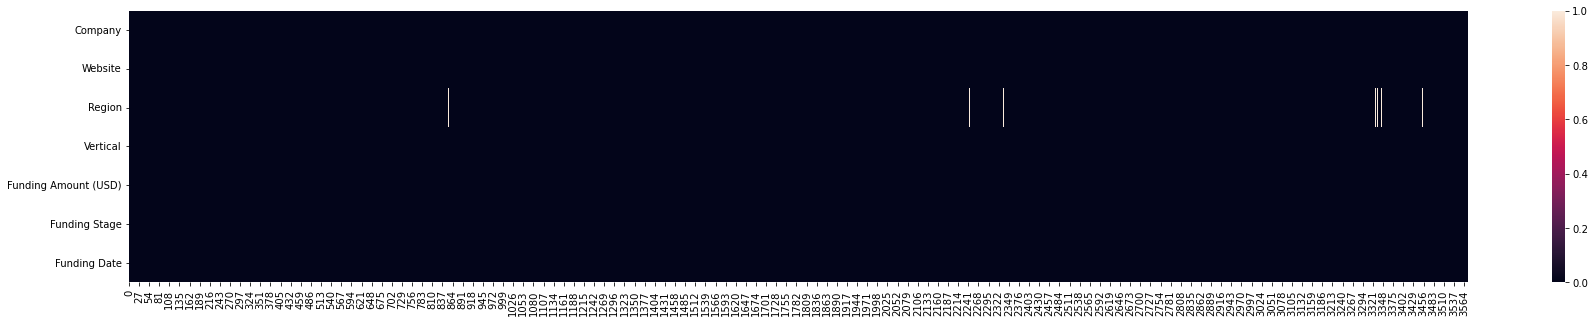

In [87]:
plt.figure(figsize=(30, 5))
sns.heatmap(raw_df.isna().T)
plt.show()

## Todo
- Look at NaN values, look for "Unknown" values to be replaced with NaN on all columns except Region
- For Nan regions, we can look for the company manually and replace the continent